In [17]:
from collections import OrderedDict
import numpy as np
import json
from maps import get_duration_matrix, lat_long_to_utm, UTM_to_lat_long, get_lat_long_from_address, plot_map_from_lat_long, plot_solution
import pyproj
from tools import write_vrplib
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt


In [18]:
# Selected Ekart Logisticsk, Bangalore, India (10, 13th Cross Rd, Gajendra Nagar, Neelasandra, Bengaluru, Karnataka 560030)as the depot 
# and picked 4 random points in 4 directions. North : 11/1, Alfred Street, Richmond Town, behind Baldwin Boys High school back gate, Bengaluru, Karnataka 560025
latitudes_longitudes = [
    (12.950622731781653, 77.60686611980422), (12.961781513385331, 77.60613557128953), 
    (13.008917308191434, 77.60560554073317), (12.951325974845842, 77.6185944837158), 
    (12.939644065994056, 77.6069720690606), (12.950675351284955, 77.59465170235006), 
    (12.948514948051532, 77.56351957345531), (12.952032317411842, 77.56250576199422), 
    (12.949041897934283, 77.56000502705686), (12.945774790699891, 77.56164064288076), 
    (12.946890897103069, 77.54528091152768), (12.945560334989311, 77.51988155464947)
]

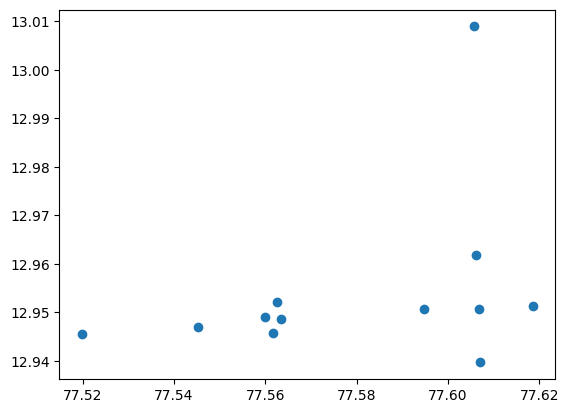

12
[5, 7, 8, 6, 4] [[12.94851495 77.56351957]
 [12.9490419  77.56000503]
 [12.94577479 77.56164064]
 [12.95203232 77.56250576]
 [12.95067535 77.5946517 ]]
[3] [[12.93964407 77.60697207]]


/tmp/ipykernel_5732/1480238114.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  solution = np.array([[5, 7, 8, 6, 4], [3], [1,  2, 11, 10,  9]])


IndexError: index 11 is out of bounds for axis 0 with size 11

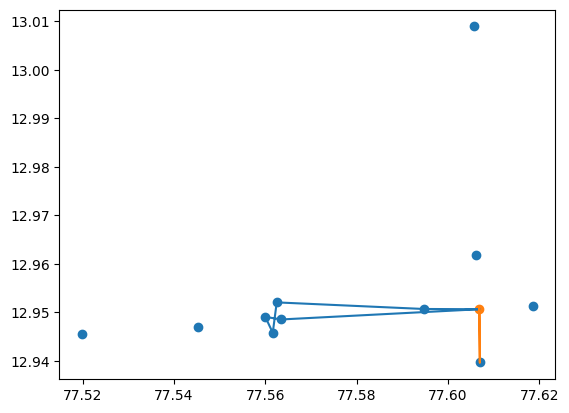

In [20]:
print(len(latitudes_longitudes))
solution = np.array([[5, 7, 8, 6, 4], [3], [1,  2, 11, 10,  9]])
plot_solution(latitudes_longitudes, solution)

In [11]:
# Populate the instance
# n : number of points
# coords : UTM of all the points
# demands : All the points have demand 1 except the first point
# capacity : 5
# vehicle_count : 4
# is_depot : boolean array indicating if the point is depot or not. First point is depot
# duration_matrix : 5x5 matrix with each element is the distance between the two points
# service_times : 0 for all points
# time_windows : pair of 0, 45000 for all points


# instance = OrderedDict()
# instance['n'] = len(latitudes_longitudes)
# instance['coords'] = lat_long_to_utm(latitudes_longitudes).tolist()
# instance['demands'] = [0] + [1] * (instance['n'] - 1)
# instance['capacity'] = 5
# instance['vehicle_count'] = 4
# instance['is_depot'] = [True] + [False] * (instance['n'] - 1)
# instance['duration_matrix'] = get_duration_matrix(latitudes_longitudes).tolist()
# instance['service_times'] = [0] * instance['n']
# instance['time_windows'] = [[0, 45000]] * instance['n']


In [12]:
# print(instance)
# print(UTM_to_lat_long(np.array(instance['coords'])))

In [13]:
# write_vrplib(filename='toy_vrp.txt', instance=instance)

In [14]:
# address = "Netaji Subhash Marg, Lal Qila, Chandni Chowk, New Delhi, Delhi 110006"
# geolocator = Nominatim(user_agent="VRPTW")
# try:
#     location = geolocator.geocode(address)
#     print(location)
#     print(location.lat, location.lon)
# except:
#     print("Address not found")

In [15]:
# plot_map_from_lat_long(latitudes_longitudes)